<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/210616_01_%EC%9A%B0%EB%A6%AC_%EB%8F%99%EB%84%A4_%EC%9D%B8%EA%B5%AC_%EA%B5%AC%EC%A1%B0%EB%A5%BC_%ED%8C%8C%EC%9D%B4_%EC%B0%A8%ED%8A%B8%EB%A1%9C_%EB%82%98%ED%83%80%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>한글 깨짐 처리하기</strong>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 제주특별자치도


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


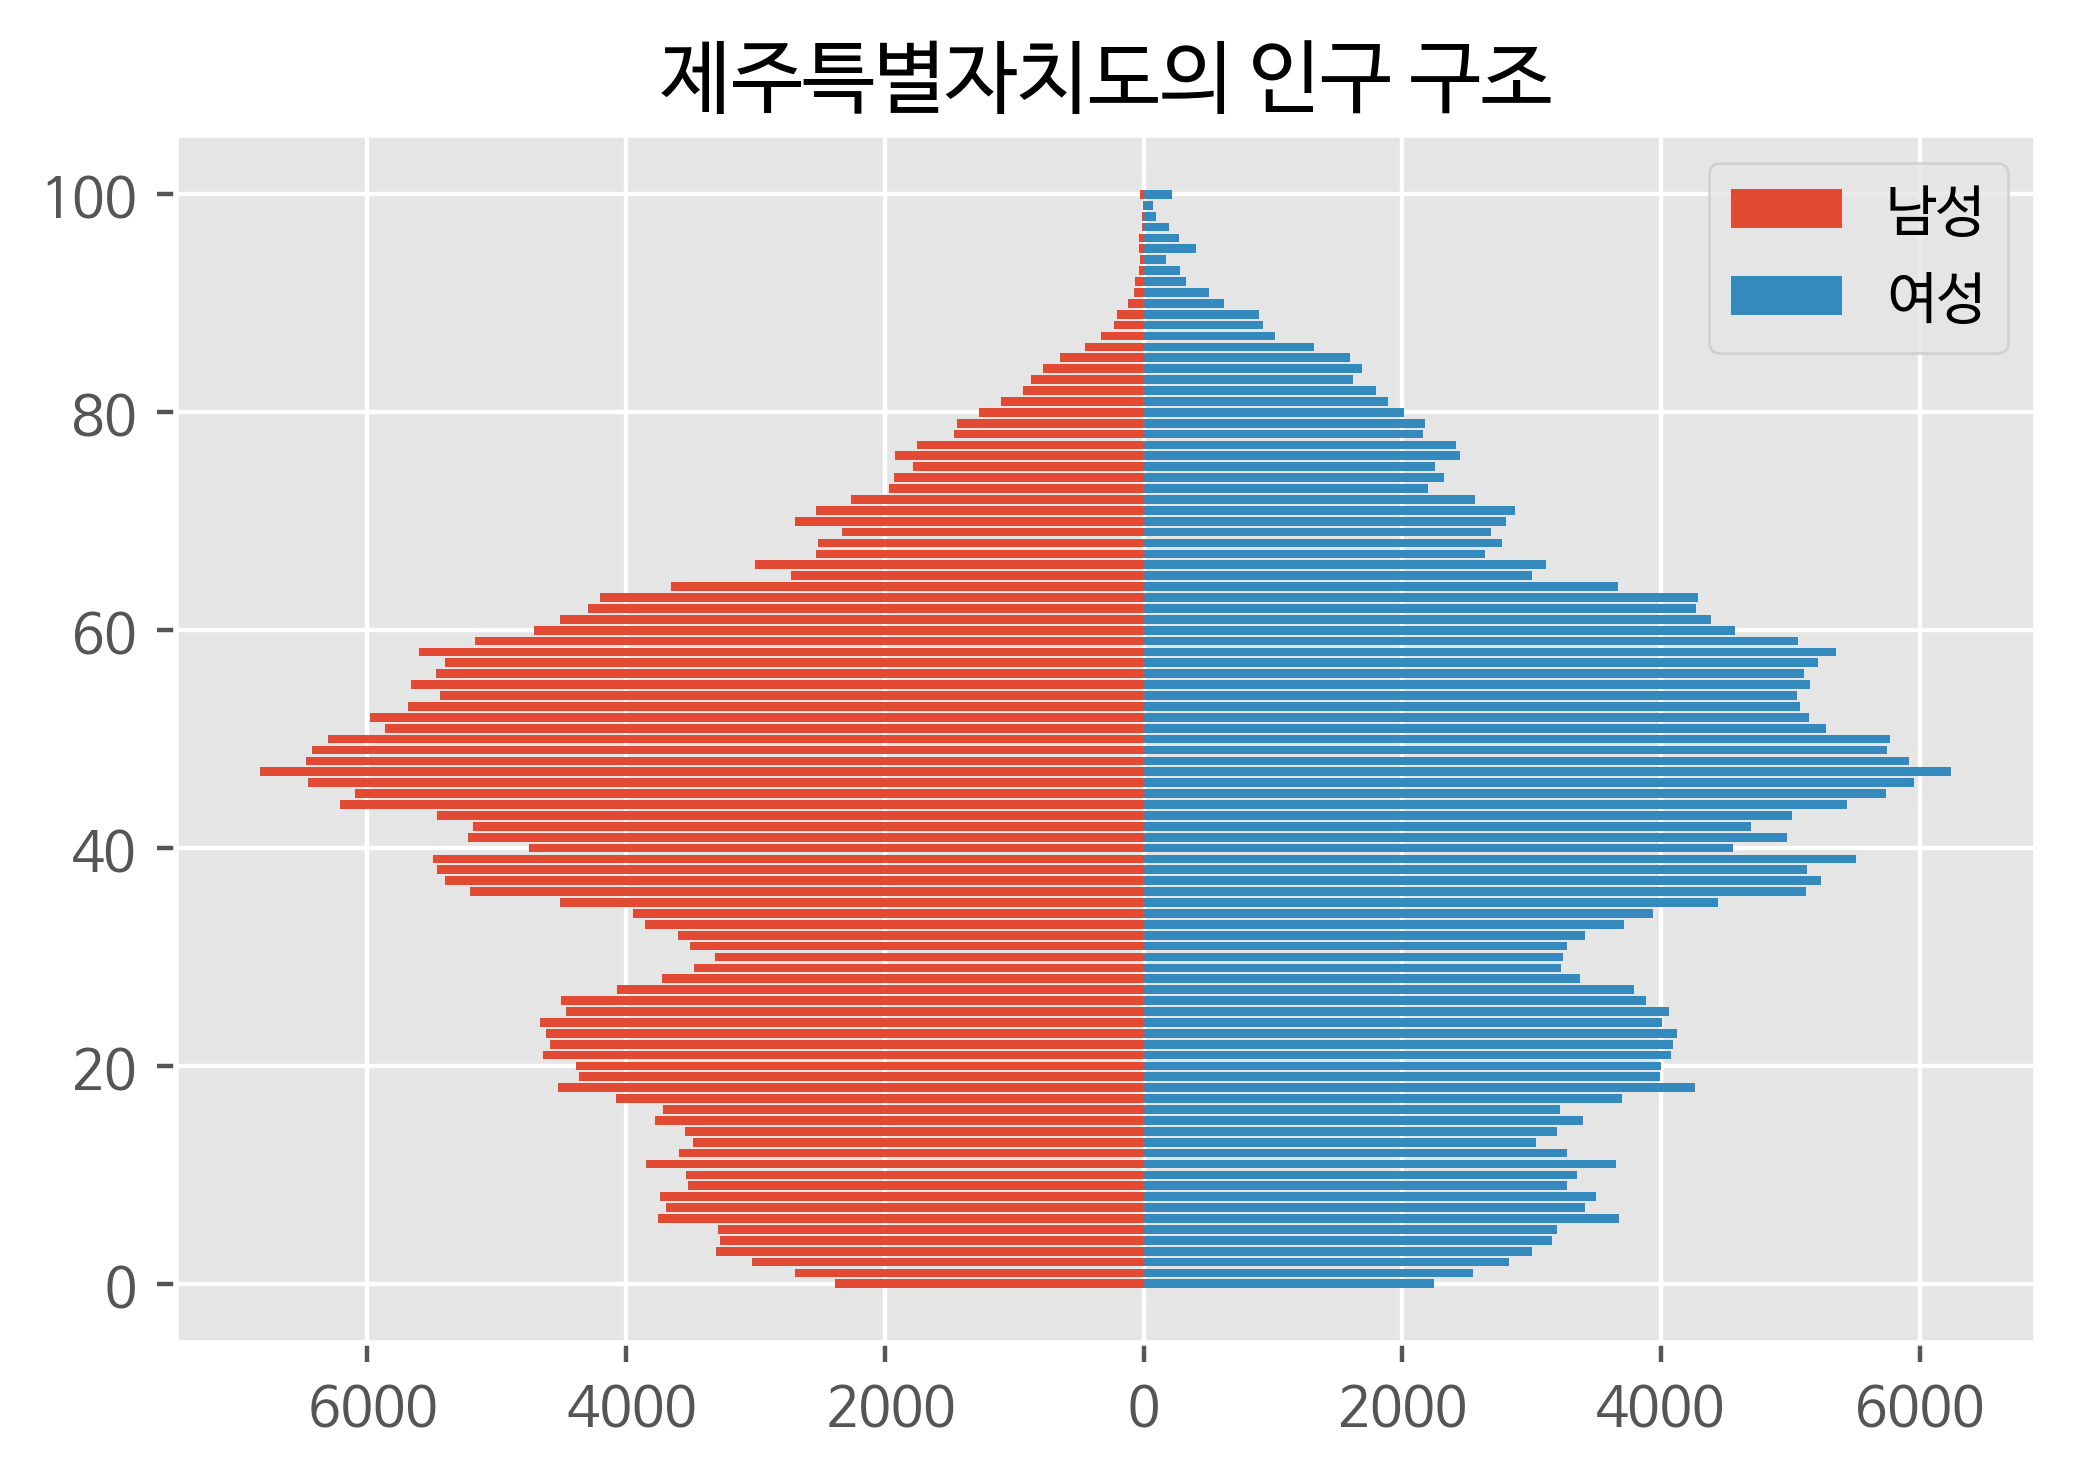

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open("/content/gender.csv", encoding="cp949")
data = csv.reader(f)
# next(data) # 헤더 넘기기

# 지역 명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

# 남자와 여자의 데이터 담을 리스트 생성
m = []
f = []

for row in data :
  if name in row[0] :
    for i in row[3:104] : # 남성 데이터 : 3 ~ 103번 데이터 슬라이싱 -> 정수형으로 변환 -> 리스트에 저장
      m.append(-int(i.replace(',','')))
    for j in row[106:] : # 여성 데이터 : 106 ~ 끝까지 데이터 슬라이싱 -> 정수형으로 변환
      f.append(int(j.replace(',','')))
    break # 

# 차트 설정
plt.figure(dpi=200) # 해상도 조절
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.barh(range(101), m, label="남성")
plt.barh(range(101), f, label='여성')
plt.title(name+'의 인구 구조')
plt.legend()
plt.show()

항아리 모양의 그래프는 연령대별 인구 차이 확인 가능<br>but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie


<strong>pie()</strong>

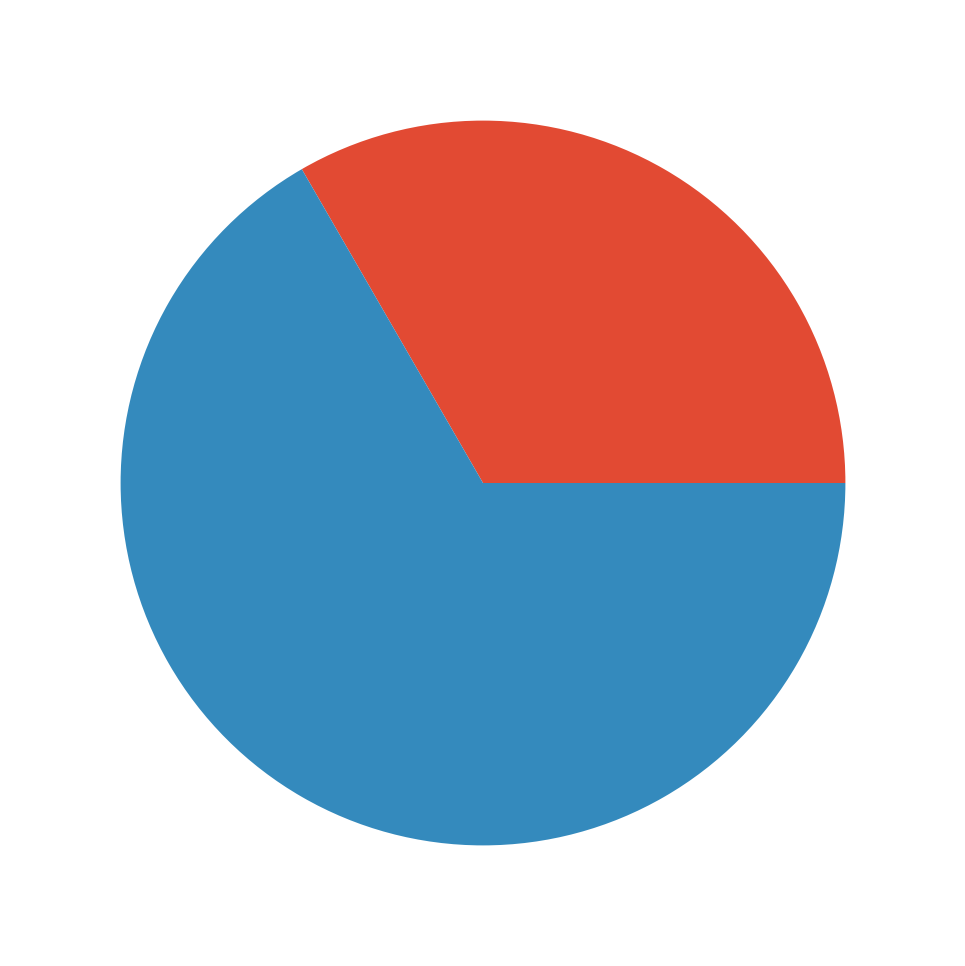

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)

plt.pie([10, 20]) # pie(x) x가 가지고 있는 값을 비율로 표시
plt.show()

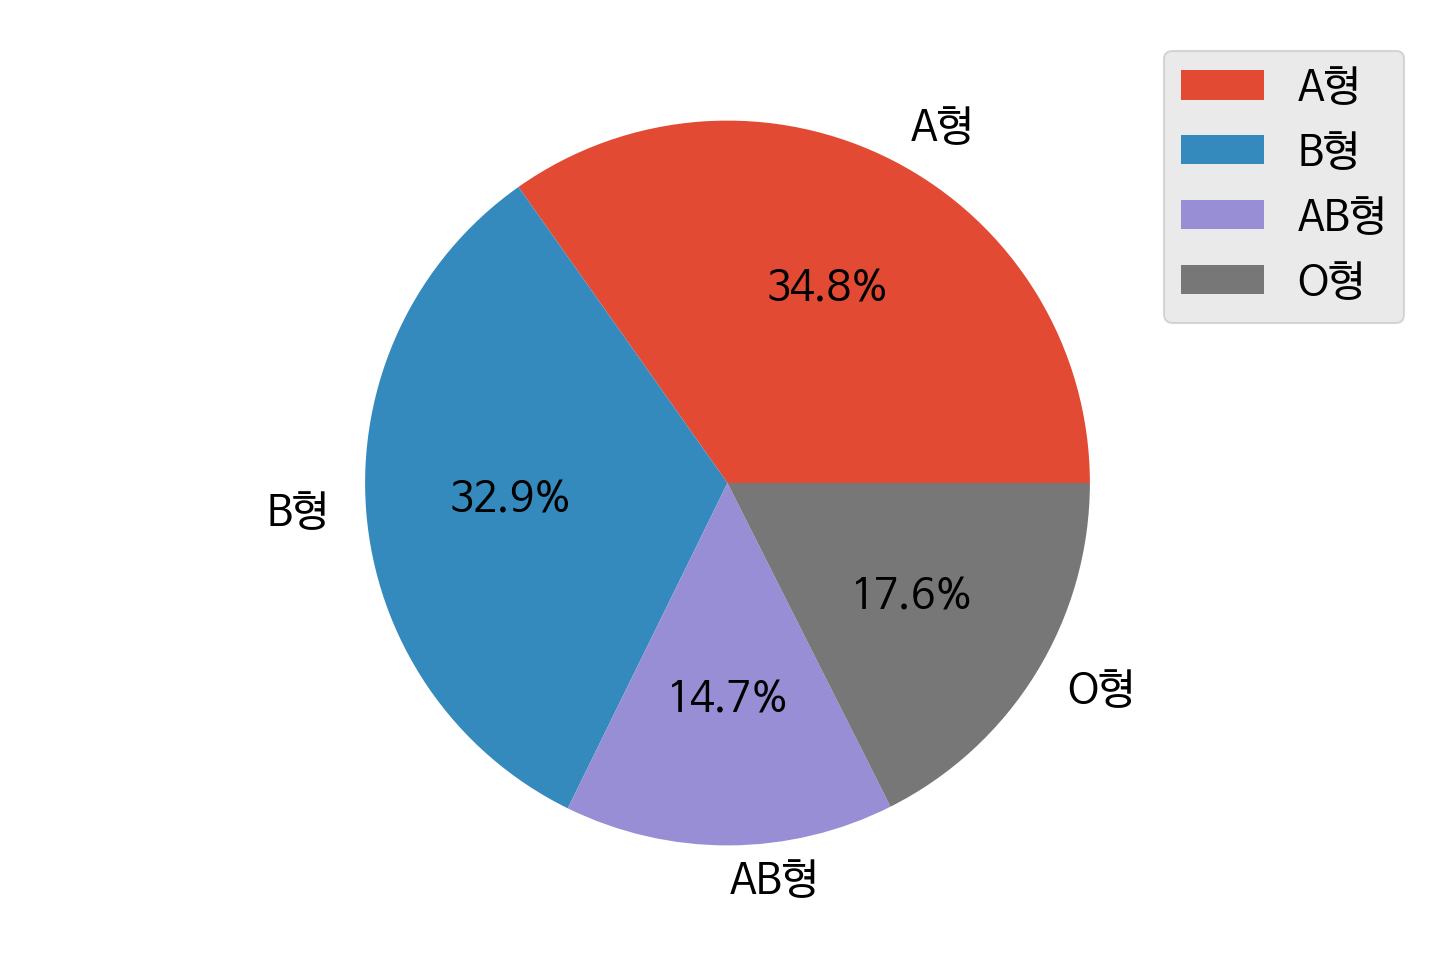

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)

size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
plt.axis('equal') # 차트를 가운데 정렬시키고, 범례 위치도 차트를 가리지 않게 조절해준다
plt.pie(size, labels=label, autopct='%.1f%%') # pie(x) x가 가지고 있는 값을 비율로 표시 # 소수는 반올림 해준다
plt.legend()
plt.show() # 데이터들을 시계 반대 방향 순으로 그린다

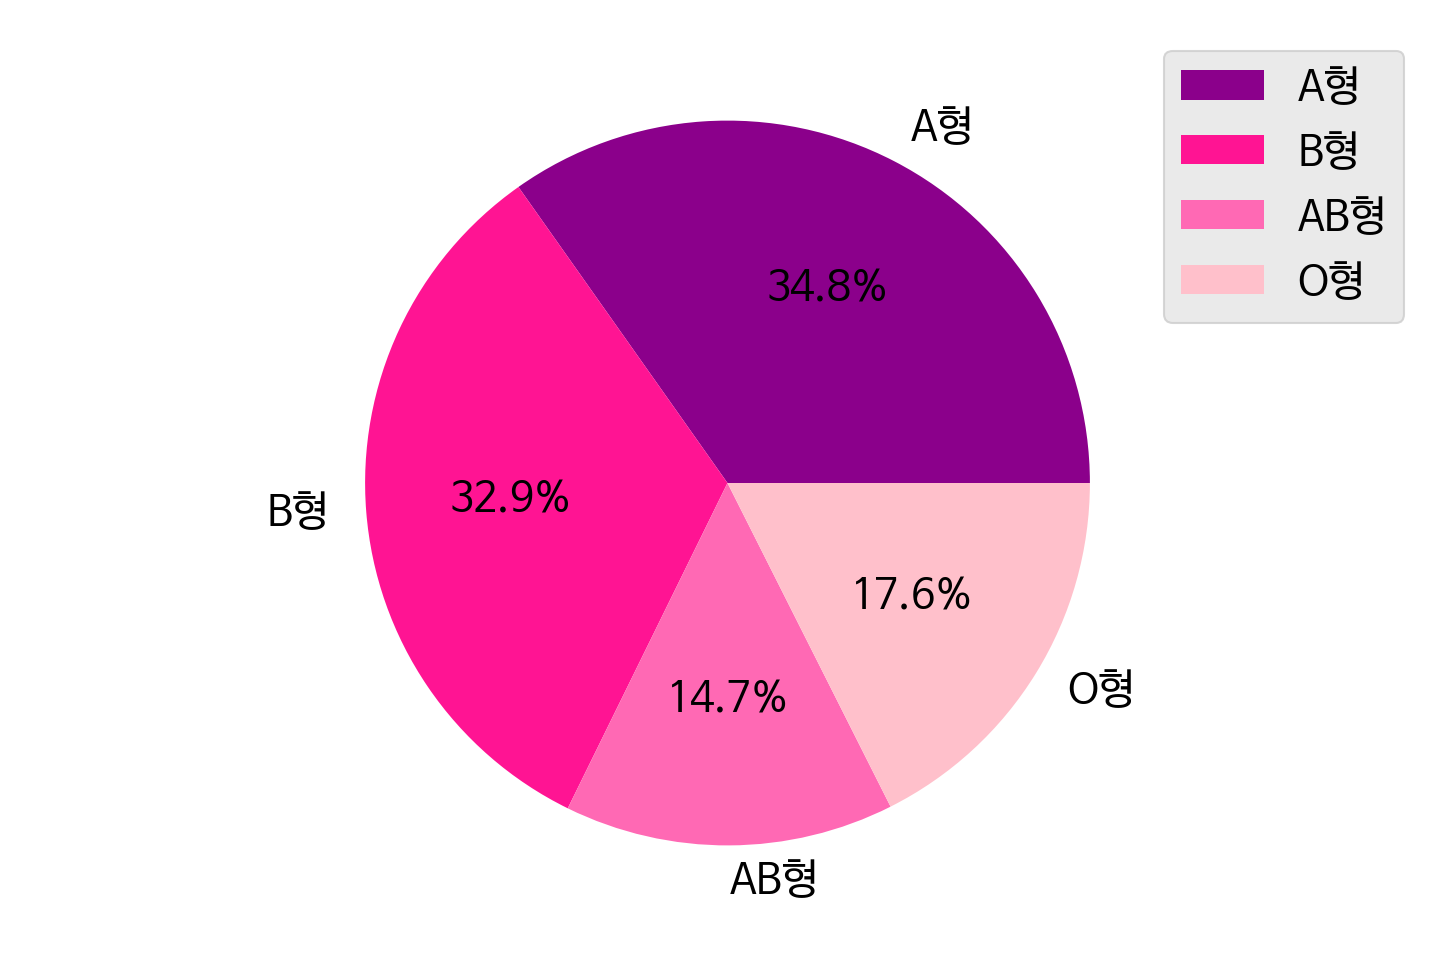

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)

size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal') # 차트를 가운데 정렬시키고, 범례 위치도 차트를 가리지 않게 조절해준다
plt.pie(size, labels=label, autopct='%.1f%%', colors=color) # pie(x) x가 가지고 있는 값을 비율로 표시 # 반올림 해준다
plt.legend()
plt.show() # 데이터들을 시계 반대 방향 순으로 그린다

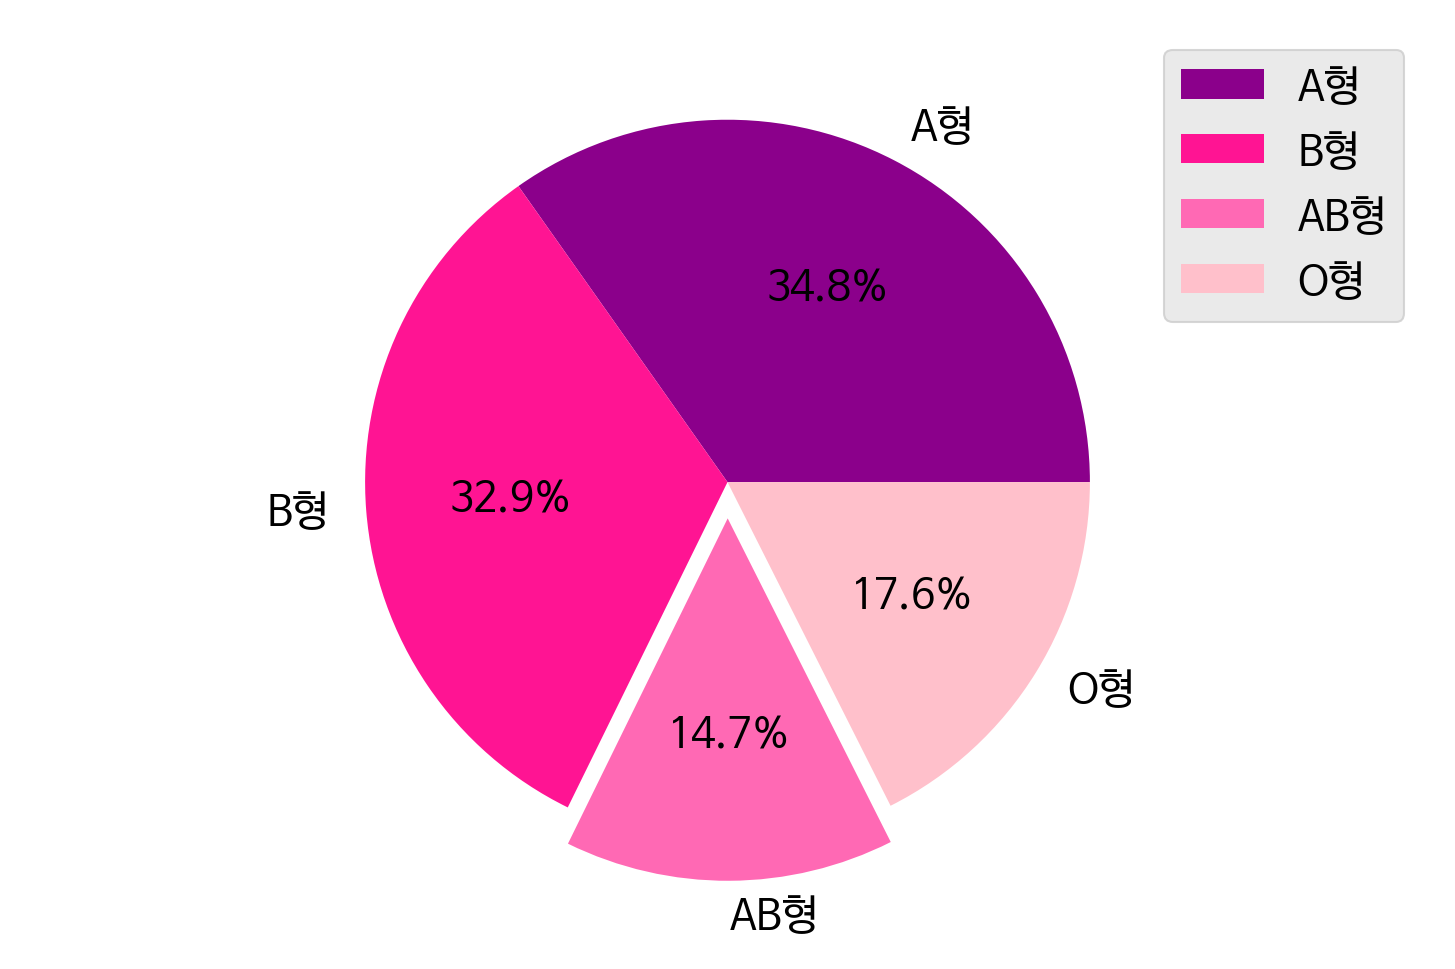

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)

size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal') # 차트를 가운데 정렬시키고, 범례 위치도 차트를 가리지 않게 조절해준다
plt.pie(size, labels = label, autopct = '%.1f%%', explode = [0,0,0.1,0], colors = color) # pie(x) x가 가지고 있는 값을 비율로 표시 # 반올림 해준다
plt.legend()
plt.show() # 데이터들을 시계 반대 방향 순으로 그린다

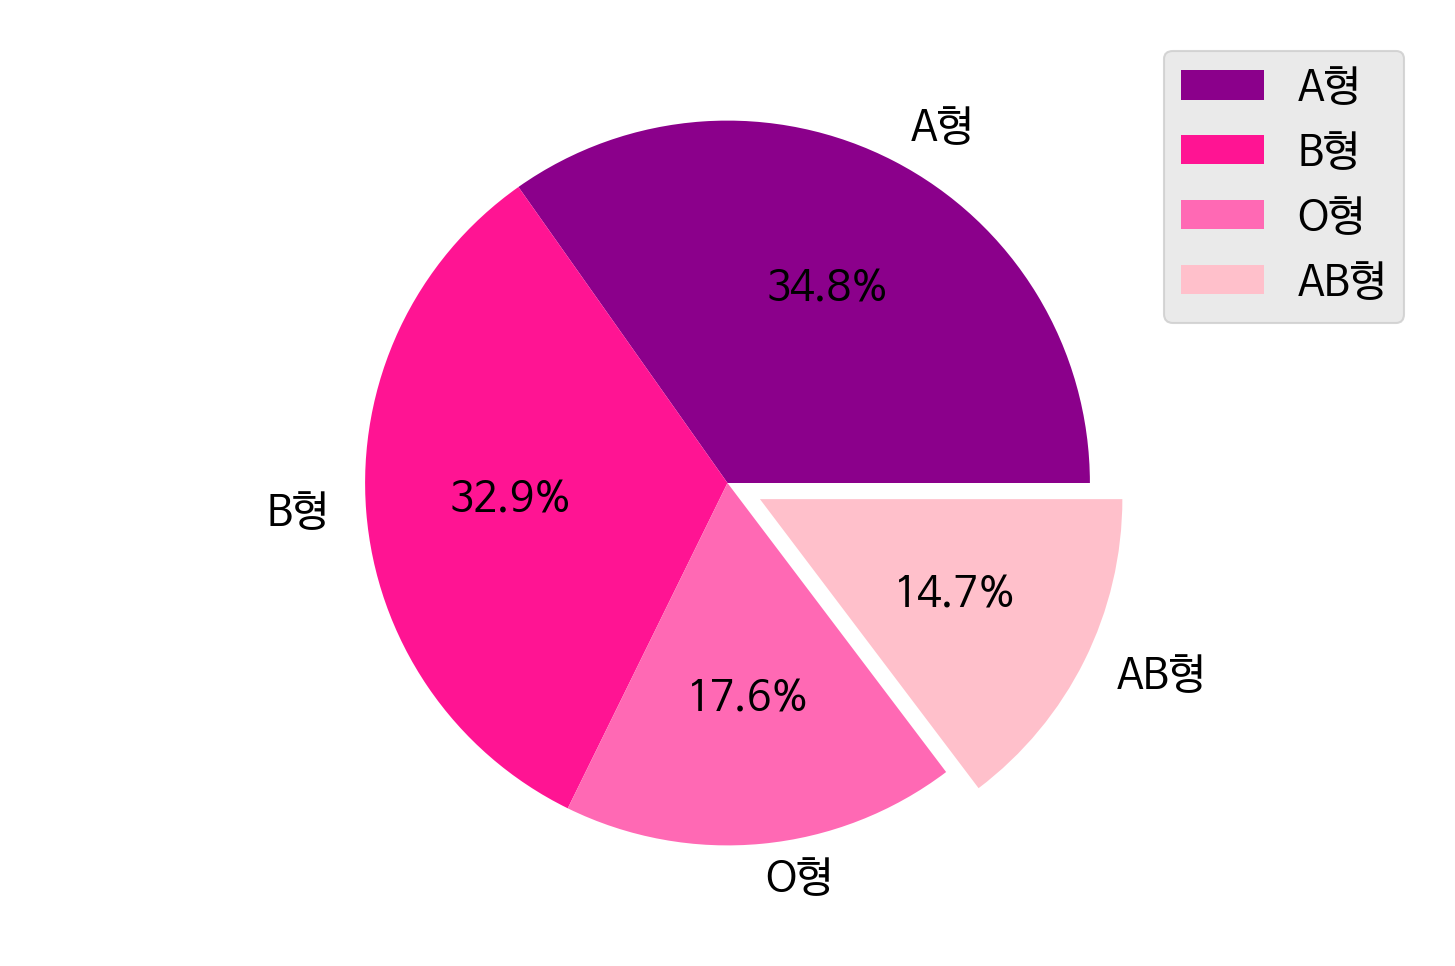

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)

size = [2441, 2312, 1233, 1031]
label = ['A형', 'B형', 'O형', 'AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal') # 차트를 가운데 정렬시키고, 범례 위치도 차트를 가리지 않게 조절해준다
plt.pie(size, labels = label, autopct = '%.1f%%', explode = [0,0,0,0.1], colors = color) # pie(x) x가 가지고 있는 값을 비율로 표시 # 반올림 해준다
plt.legend()
plt.show() # 데이터들을 시계 반대 방향 순으로 그린다

제주도의 성별 인구 비율 표현하기

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 제주특별자치도


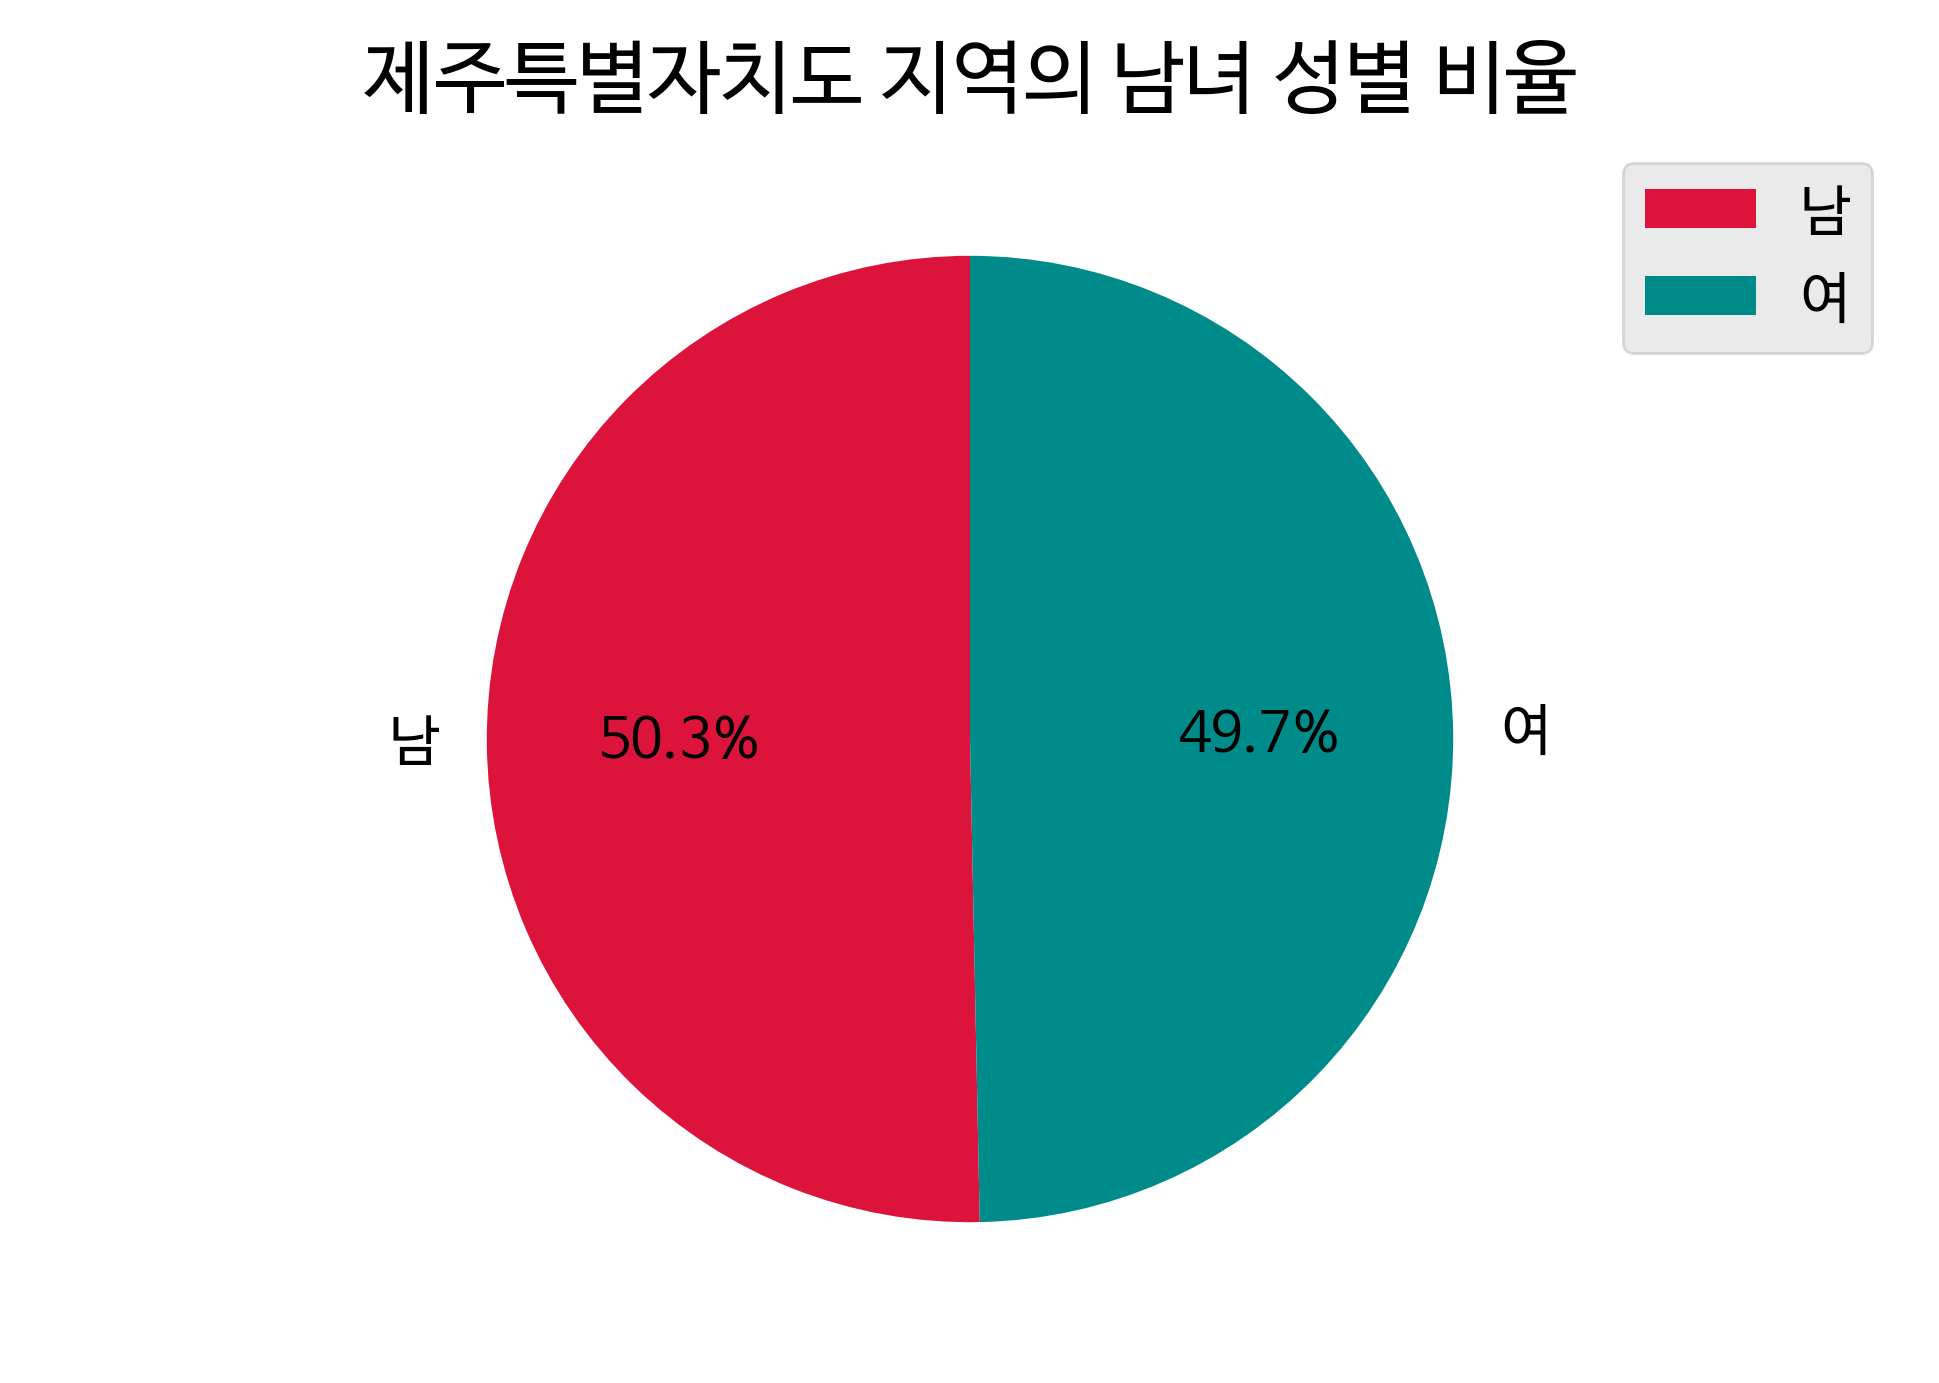

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open("/content/gender.csv", encoding="cp949")
data = csv.reader(f)
# next(data) # 헤더 넘기기

size = [] # 제주도의 남성 인구 합계, 여성 인구 합계

# 지역 명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data :
  if name in row[0] :
    m = 0 # 남성 인구수 합계 변수
    f = 0 # 여성 인구수 합계 변수
    for i in range(101) :
      m += int(row[3+i].replace(',','')) # m = m + int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',',''))
    break

size.append(m)
size.append(f)

# pie 차트 시각화

# 차트 설정
plt.figure(dpi=200) # 해상도 조절
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리

# 차트 그리기
color = ['crimson', 'darkcyan']
label = ['남', '여']
plt.axis('equal') # 차트를 가운데 정렬시키고, 범례 위치도 차트를 가리지 않게 조절해준다
plt.pie(size, labels=label, autopct='%.1f%%', colors=color, startangle=90) # pie(x) x가 가지고 있는 값을 비율로 표시 # 반올림 해준다
plt.legend()
plt.title(name+' 지역의 남녀 성별 비율')
plt.show() # 데이터들을 시계 반대 방향 순으로 그린다

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 세종특별자치시


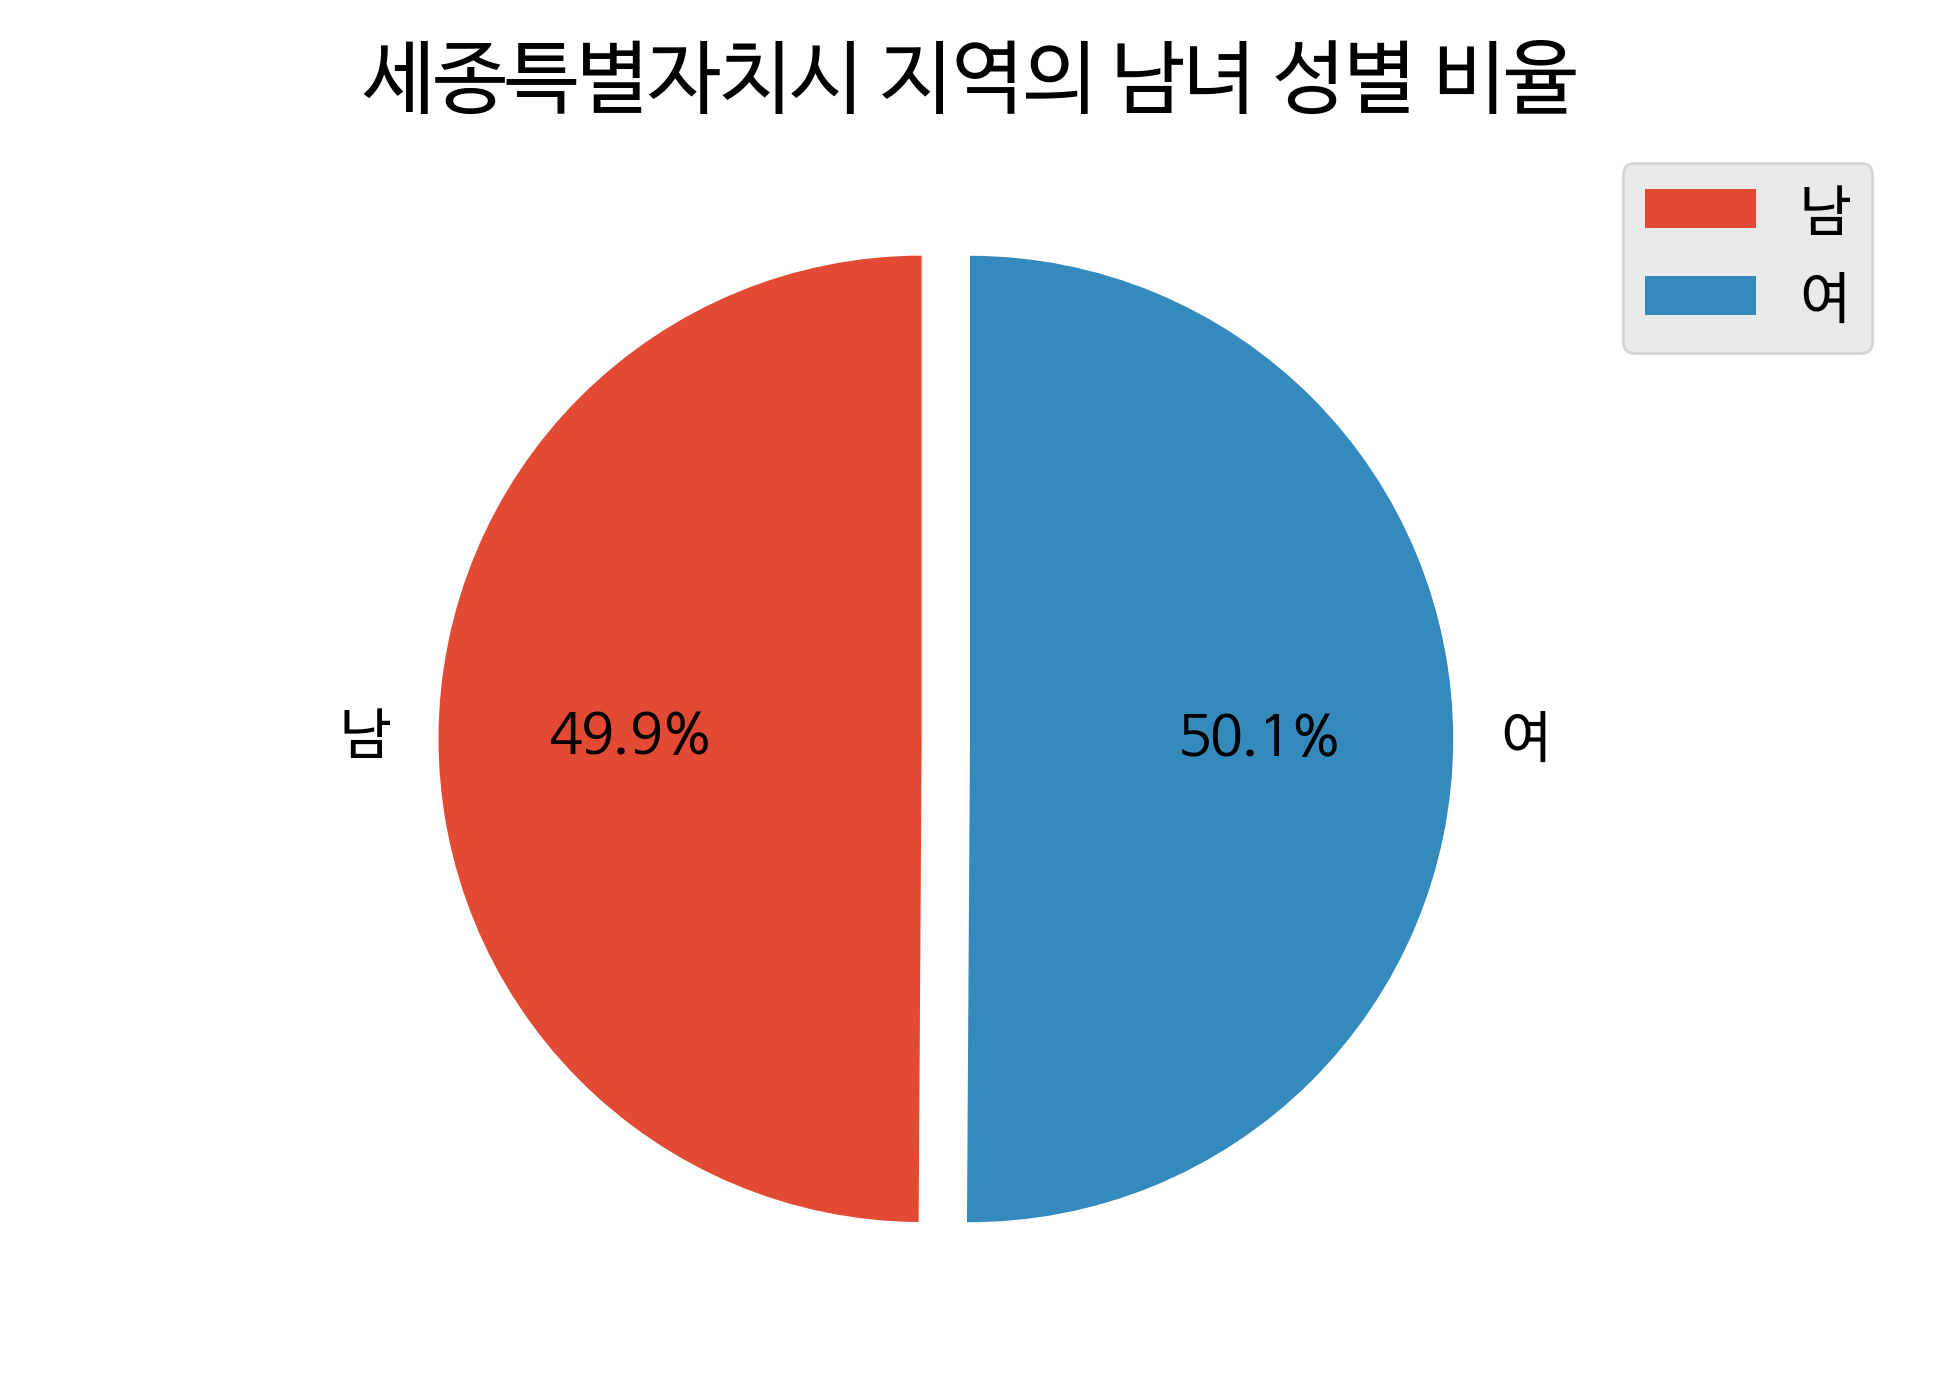

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open("/content/gender.csv", encoding="cp949")
data = csv.reader(f)
# next(data) # 헤더 넘기기

size = [] # 제주도의 남성 인구 합계, 여성 인구 합계

# 지역 명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data :
  if name in row[0] :
    m = 0 # 남성 인구수 합계 변수
    f = 0 # 여성 인구수 합계 변수
    for i in range(101) :
      m += int(row[3+i].replace(',','')) # m = m + int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',',''))
    break

size.append(m)
size.append(f)

# pie 차트 시각화

# 차트 설정
plt.figure(dpi=200) # 해상도 조절
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리

# 차트 그리기
label = ['남', '여']
plt.axis('equal') # 차트를 가운데 정렬시키고, 범례 위치도 차트를 가리지 않게 조절해준다
plt.pie(size, labels=label, autopct='%.1f%%', explode= [0.1, 0], startangle=90) # pie(x) x가 가지고 있는 값을 비율로 표시 # 반올림 해준다
plt.legend()
plt.title(name+' 지역의 남녀 성별 비율')
plt.show() # 데이터들을 시계 반대 방향 순으로 그린다